##### Team Project 01 by 김남은

# GDP 상위 7개 국가와 코로나 국가 간의 상관관계

## 목표 >

###### GDP 금액으로 유추해 보는 코로나에 대처하는 국가들의 상관관계

#### 참조링크

###### 1. 코로나 실시간 상황판 
    * https://coronaboard.kr/
###### 2. GDP 금액과 국가 순위 
    * http://search.daum.net/searchnil_suggest=btn&w=tot&DA=SBC&q=%EC%84%B8%EA%B3%84+gdp+%EC%88%9C%EC%9C%84

## 과정 >

###### 1) GDP 데이터를 추출한다.
###### 2) 코로나 실시간 상황판에서 데이터를 추출한다.
###### 3) 국가이름으로 데이터를 병합하기 위해 코로나 데이터에서 국가 코드를 제거한다.
###### 4) 두 데이터를 병합한다.
###### 5) 병합된 데이터의 GDP금액을 숫자형으로 치환한다.
###### 6) 시각화 한다.

## 결과 >

![result](C:\Users\Jongho\Documents\Practice)

## 해석 및 향후 개선 사항 >

* GDP가 높으면 생활수준이 높아 질병에 대한 대처가 신속할 것으로 예상하여, 완치율이 높을 것이라 생각하였다. 그러나, GDP와 코로나 완치율이 음의 상관관계로 확인된 것으로 미루어, GDP가 높아도 코로나에 대한 대처는 아직까지 미흡한 것으로 보인다.
  
* 데이터 전처리에 있어서 많은 애로사항이 있었다.
    * 국가코드 제거, GDP 금액의 한글 제거 후 숫자로 치환
  
* NaN 값으로 인해 데이터 시각화가 너무 단순하게 처리된 거 같아 데이터를 의미있는 값으로 변경 후 재시각화를 해야겠다.

### 필수 라이브러리

In [11]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

from selenium import webdriver
from bs4 import BeautifulSoup

import time

#### 1. 웹 드라이버 객체 할당 & 크롤링 위한 웹 페이지 띄우기

In [12]:
driver = webdriver.Chrome('./chromedriver_90')
driver2 = webdriver.Chrome('./chromedriver_90')

url = 'https://coronaboard.kr/' 
url2 = 'http://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q=%EC%84%B8%EA%B3%84+gdp+%EC%88%9C%EC%9C%84'

driver.get(url)
driver2.get(url2)

time.sleep(3)  # 필수는 아니지만, 서버에서 크롤링 할 때 과부하를 막기 위함?!

#### 2. GDP 국가 및 GDP 금액 데이터 추출하기

In [13]:
page = driver2.page_source
soup = BeautifulSoup(page, 'html.parser')

gdp_country = [] #GDP 국가들
gdp_list = [] #GDP 금액들

sel_btn = driver2.find_element_by_xpath('//*[@id="dklColl"]/div/div[22]/a[2]')
sel_btn.click()  # 1부터 18페이지까지 클릭

country = soup.find_all("a", class_="link_name")
country = list(country)

gdp = soup.find_all("td", class_="txt_ar")
gdp = list(gdp)

for one in country:
    one = one.text
    gdp_country.append(one)

for one_gdp in gdp:
    one_gdp = one_gdp.text
    jo  = 0
    eog = 0
    man = 0
    
    if '조' in one_gdp :
        jo_idx = one_gdp.index('조')
        jo = int(one_gdp[:jo_idx]) * 1000000000000
        one_gdp = one_gdp.split('조')[1]
    
    elif '억' in one_gdp :
        eog_idx = one_gdp.index('억')
        eog = int(one_gdp[:eog_idx]) * 100000000   
        one_gdp = one_gdp.split('억')[1]
    
    elif '만' in one_gdp :
        man = int(one_gdp[:-1]) * 10000
    one_gdp = jo + eog + man
    print(one_gdp)
    gdp_list.append(one_gdp)

21000000000000
14000000000000
5000000000000
3000000000000
2000000000000
2000000000000
2000000000000
1000000000000
1000000000000
1000000000000
1000000000000
1000000000000
1000000000000
1000000000000
1000000000000
1000000000000
902300000000
779200000000
743700000000
715300000000
586100000000
565800000000
529100000000
528900000000
517600000000
458500000000
447700000000
446500000000
445400000000
417600000000
405700000000
387700000000
384900000000
365300000000
362800000000
358800000000
356800000000
347100000000
327800000000
317400000000
302200000000
294200000000
284200000000
269600000000
261600000000
246900000000
243600000000
236400000000
228900000000
224400000000
214000000000
204600000000
191800000000
172700000000
170400000000
170300000000
150400000000
137500000000
119000000000
107900000000
106500000000
99900000000
98600000000
91500000000
91100000000
89400000000
86500000000
81300000000
76600000000
70100000000
69400000000
68500000000
67000000000
66200000000
65900000000
62500000000
622000000

#### 3. GDP 국가 및 금액 데이터 만들기

In [14]:
import pandas as pd

gdp_dat = {"국가":gdp_country[:7]+gdp_country[-7:],"GDP($)":gdp_list[:7]+gdp_list[-7:]}
dat= pd.DataFrame(gdp_dat)
dat

,국가,GDP($)
0,미국,21000000000000
1,중국,14000000000000
2,일본,5000000000000
3,독일,3000000000000
4,인도,2000000000000
5,영국,2000000000000
6,프랑스,2000000000000
7,상투메 프린시페,400000000
8,미크로네시아,300000000
9,팔라우,200000000


#### 4. 코로나 실시간 현황판에서 데이터 추출하기

In [15]:
from selenium.webdriver import ActionChains  # ActionChains 라이브러리 이용해서
import time
some_tag = driver.find_element_by_id('show-more')   # id='show-more'를 driver로 찾기 
ActionChains(driver).move_to_element(some_tag).perform() #some_tag element로 이동해서
some_tag.click()  #some_tag로 클릭
time.sleep(3)
some_tag.click()  # 다음페이지로 넘어가기 위해 다시 some_tag로 클릭

#### - xpath에서 국가 데이터 갖고오는지 확인

In [16]:
co_country = driver.find_elements_by_xpath('//*[@id="country-table"]/div/div/table/tbody/tr/td[2]')

for co_one in co_country:
    print(co_one.text)

미국🇺🇸
인도🇮🇳
브라질🇧🇷
프랑스🇫🇷
터키🇹🇷
러시아🇷🇺
영국🇬🇧
아르헨티나🇦🇷
이탈리아🇮🇹
콜롬비아🇨🇴
스페인🇪🇸
독일🇩🇪
이란🇮🇷
폴란드🇵🇱
멕시코🇲🇽
우크라이나🇺🇦
인도네시아🇮🇩
페루🇵🇪
남아프리카 공화국🇿🇦
네덜란드🇳🇱
체코🇨🇿
칠레🇨🇱
캐나다🇨🇦
필리핀🇵🇭
이라크🇮🇶
스웨덴🇸🇪
벨기에🇧🇪
루마니아🇷🇴
파키스탄🇵🇰
방글라데시🇧🇩
포르투갈🇵🇹
이스라엘🇮🇱
헝가리🇭🇺
일본🇯🇵*
요르단🇯🇴
말레이시아🇲🇾
세르비아🇷🇸
스위스🇨🇭
오스트리아🇦🇹
네팔🇳🇵
아랍에미레이트🇦🇪
레바논🇱🇧
모로코🇲🇦
사우디아라비아🇸🇦
에콰도르🇪🇨
볼리비아🇧🇴
불가리아🇧🇬
그리스🇬🇷
카자흐스탄🇰🇿
벨라루스🇧🇾
파라과이🇵🇾
파나마🇵🇦
튀니지🇹🇳
슬로바키아🇸🇰
우루과이🇺🇾
조지아🇬🇪
크로아티아🇭🇷
코스타리카🇨🇷
쿠웨이트🇰🇼
아제르바이잔🇦🇿
도미니카 공화국🇩🇴
팔레스타인🇵🇸
덴마크🇩🇰
과테말라🇬🇹
이집트🇪🇬
리투아니아🇱🇹
에티오피아🇪🇹
아일랜드🇮🇪
베네수엘라🇻🇪
바레인🇧🇭
슬로베니아🇸🇮
오만🇴🇲
몰도바🇲🇩
온두라스🇭🇳
스리랑카🇱🇰
태국🇹🇭
아르메니아🇦🇲
카타르🇶🇦
보스니아 헤르체고비나🇧🇦
리비아🇱🇾
케냐🇰🇪
쿠바🇨🇺
나이지리아🇳🇬
북마케도니아🇲🇰
대한민국🇰🇷
미얀마🇲🇲
잠비아🇿🇲
알제리🇩🇿
라트비아🇱🇻
알바니아🇦🇱
에스토니아🇪🇪
노르웨이🇳🇴
키르기스스탄🇰🇬
아프가니스탄🇦🇫
우즈베키스탄🇺🇿
코소보🇽🇰
몽골🇲🇳
몬테네그로🇲🇪
가나🇬🇭
핀란드🇫🇮
중국🇨🇳
카메룬🇨🇲
나미비아🇳🇦
엘살바도르🇸🇻
우간다🇺🇬
키프로스🇨🇾
모잠비크🇲🇿
몰디브🇲🇻
룩셈부르크🇱🇺
보츠와나🇧🇼
싱가포르🇸🇬
자메이카🇯🇲
코트디부아르🇨🇮
캄보디아🇰🇭
짐바브웨🇿🇼
세네갈🇸🇳
마다가스카르🇲🇬
콩고민주공화국🇨🇩
앙골라🇦🇴
수단🇸🇩
말라위🇲🇼
르완다🇷🇼
카보베르데🇨🇻
트리니다드 토바고🇹🇹
몰타 공화국🇲🇹
호주🇦🇺
레위니옹🇷🇪
프랑스령 기아나🇬🇫
시리아🇸🇾
가봉🇬🇦
기니🇬🇳
수리남🇸🇷
모리타니🇲🇷
마요트🇾🇹
가이아나🇬🇾
프랑스령 폴리네시아🇵🇫
에스와티니🇸🇿
아이티🇭🇹
파푸아뉴기니🇵🇬
과들루프🇬🇵
소말리아🇸🇴
세이셸🇸🇨
말리🇲🇱
대만🇹🇼
베

#### - 모든 데이터 확인

In [17]:
all_corona_data = []   # 코로나 실시간 상황판에서의 세계 데이터 담을 List
for i in range(2, 9):  # xpath의 규칙을 확인해보니 td[] 안의 숫자로 국가, 확진자 등 확인  
    tmp = '//*[@id="country-table"]/div/div/table/tbody/tr/td[{}]'.format(i)
    # print(tmp)
    sel_ele = driver.find_elements_by_xpath(tmp)
    column_data = []
    for one in sel_ele:
        # print(one.text)
        column_data.append(one.text)
    all_corona_data.append(column_data)
    print(column_data)
    print()
all_corona_data

['미국🇺🇸', '인도🇮🇳', '브라질🇧🇷', '프랑스🇫🇷', '터키🇹🇷', '러시아🇷🇺', '영국🇬🇧', '아르헨티나🇦🇷', '이탈리아🇮🇹', '콜롬비아🇨🇴', '스페인🇪🇸', '독일🇩🇪', '이란🇮🇷', '폴란드🇵🇱', '멕시코🇲🇽', '우크라이나🇺🇦', '인도네시아🇮🇩', '페루🇵🇪', '남아프리카 공화국🇿🇦', '네덜란드🇳🇱', '체코🇨🇿', '칠레🇨🇱', '캐나다🇨🇦', '필리핀🇵🇭', '이라크🇮🇶', '스웨덴🇸🇪', '벨기에🇧🇪', '루마니아🇷🇴', '파키스탄🇵🇰', '방글라데시🇧🇩', '포르투갈🇵🇹', '이스라엘🇮🇱', '헝가리🇭🇺', '일본🇯🇵*', '요르단🇯🇴', '말레이시아🇲🇾', '세르비아🇷🇸', '스위스🇨🇭', '오스트리아🇦🇹', '네팔🇳🇵', '아랍에미레이트🇦🇪', '레바논🇱🇧', '모로코🇲🇦', '사우디아라비아🇸🇦', '에콰도르🇪🇨', '볼리비아🇧🇴', '불가리아🇧🇬', '그리스🇬🇷', '카자흐스탄🇰🇿', '벨라루스🇧🇾', '파라과이🇵🇾', '파나마🇵🇦', '튀니지🇹🇳', '슬로바키아🇸🇰', '우루과이🇺🇾', '조지아🇬🇪', '크로아티아🇭🇷', '코스타리카🇨🇷', '쿠웨이트🇰🇼', '아제르바이잔🇦🇿', '도미니카 공화국🇩🇴', '팔레스타인🇵🇸', '덴마크🇩🇰', '과테말라🇬🇹', '이집트🇪🇬', '리투아니아🇱🇹', '에티오피아🇪🇹', '아일랜드🇮🇪', '베네수엘라🇻🇪', '바레인🇧🇭', '슬로베니아🇸🇮', '오만🇴🇲', '몰도바🇲🇩', '온두라스🇭🇳', '스리랑카🇱🇰', '태국🇹🇭', '아르메니아🇦🇲', '카타르🇶🇦', '보스니아 헤르체고비나🇧🇦', '리비아🇱🇾', '케냐🇰🇪', '쿠바🇨🇺', '나이지리아🇳🇬', '북마케도니아🇲🇰', '대한민국🇰🇷', '미얀마🇲🇲', '잠비아🇿🇲', '알제리🇩🇿', '라트비아🇱🇻', '알바니아🇦🇱', '에스토니아🇪🇪', '노르웨이🇳🇴', '키르기스스탄🇰🇬', '아프가니스탄🇦🇫', '우즈베키스탄🇺🇿', '코소보🇽🇰', '몽골🇲🇳', '몬테네그로🇲🇪', '가나🇬🇭', '핀란드🇫🇮', '중국🇨🇳', '카메룬

['1.8', '1.3', '2.8', '1.9', '0.9', '2.4', '2.7', '2.1', '3.0', '2.5', '2.1', '2.4', '2.7', '2.6', '9.3', '2.3', '2.7', '9.4', '3.2', '1.1', '1.8', '2.1', '1.9', '1.7', '1.3', '1.3', '2.3', '3.0', '2.3', '1.6', '2.0', '0.8', '3.7', '1.8', '1.3', '0.7', '1.0', '1.5', '1.6', '1.4', '0.3', '1.4', '1.8', '1.6', '4.8', '3.8', '4.3', '3.0', '1.0', '0.7', '2.9', '1.6', '3.6', '3.2', '1.5', '1.4', '2.3', '1.3', '0.5', '1.5', '1.2', '1.1', '0.9', '3.1', '5.7', '1.6', '1.6', '1.8', '1.1', '0.5', '1.7', '1.1', '2.4', '2.7', '1.1', '0.8', '2.0', '0.3', '4.7', '1.7', '2.0', '0.7', '1.3', '3.5', '1.3', '2.2', '1.3', '2.7', '1.8', '1.9', '1.0', '0.6', '1.7', '4.0', '0.7', '2.1', '0.5', '1.6', '0.8', '1.0', '5.1', '1.6', '1.6', '3.0', '1.0', '0.5', '1.2', '0.3', '1.2', '1.6', '0.1', '2.1', '0.6', '1.1', '3.9', '2.7', '2.1', '2.3', '2.3', '7.5', '3.4', '1.2', '0.9', '2.5', '1.4', '3.0', '0.8', '0.5', '7.3', '0.6', '0.7', '2.3', '2.4', '0.9', '2.4', '0.7', '3.6', '2.2', '1.0', '1.4', '5.2', '0.4', '3.6'

[['미국🇺🇸',
  '인도🇮🇳',
  '브라질🇧🇷',
  '프랑스🇫🇷',
  '터키🇹🇷',
  '러시아🇷🇺',
  '영국🇬🇧',
  '아르헨티나🇦🇷',
  '이탈리아🇮🇹',
  '콜롬비아🇨🇴',
  '스페인🇪🇸',
  '독일🇩🇪',
  '이란🇮🇷',
  '폴란드🇵🇱',
  '멕시코🇲🇽',
  '우크라이나🇺🇦',
  '인도네시아🇮🇩',
  '페루🇵🇪',
  '남아프리카 공화국🇿🇦',
  '네덜란드🇳🇱',
  '체코🇨🇿',
  '칠레🇨🇱',
  '캐나다🇨🇦',
  '필리핀🇵🇭',
  '이라크🇮🇶',
  '스웨덴🇸🇪',
  '벨기에🇧🇪',
  '루마니아🇷🇴',
  '파키스탄🇵🇰',
  '방글라데시🇧🇩',
  '포르투갈🇵🇹',
  '이스라엘🇮🇱',
  '헝가리🇭🇺',
  '일본🇯🇵*',
  '요르단🇯🇴',
  '말레이시아🇲🇾',
  '세르비아🇷🇸',
  '스위스🇨🇭',
  '오스트리아🇦🇹',
  '네팔🇳🇵',
  '아랍에미레이트🇦🇪',
  '레바논🇱🇧',
  '모로코🇲🇦',
  '사우디아라비아🇸🇦',
  '에콰도르🇪🇨',
  '볼리비아🇧🇴',
  '불가리아🇧🇬',
  '그리스🇬🇷',
  '카자흐스탄🇰🇿',
  '벨라루스🇧🇾',
  '파라과이🇵🇾',
  '파나마🇵🇦',
  '튀니지🇹🇳',
  '슬로바키아🇸🇰',
  '우루과이🇺🇾',
  '조지아🇬🇪',
  '크로아티아🇭🇷',
  '코스타리카🇨🇷',
  '쿠웨이트🇰🇼',
  '아제르바이잔🇦🇿',
  '도미니카 공화국🇩🇴',
  '팔레스타인🇵🇸',
  '덴마크🇩🇰',
  '과테말라🇬🇹',
  '이집트🇪🇬',
  '리투아니아🇱🇹',
  '에티오피아🇪🇹',
  '아일랜드🇮🇪',
  '베네수엘라🇻🇪',
  '바레인🇧🇭',
  '슬로베니아🇸🇮',
  '오만🇴🇲',
  '몰도바🇲🇩',
  '온두라스🇭🇳',
  '스리랑카🇱🇰',
  '태국🇹🇭',
  '아르메니아🇦🇲',
  '카타르🇶🇦',
  '보스니아 헤르체고비나🇧🇦',
  '리비아🇱🇾',
  '케냐🇰🇪',
  '쿠바🇨🇺',
  '나이지리아🇳🇬',
  '북마케도니아🇲🇰',
  '대

#### 5. 정규식을 이용하여 코로나 데이터의 국가이름에서 코드를 제거 
####     (국가이름으로 GDP데이터와 병합하기 위함)

In [18]:
import pandas as pd
import re
cnara =[]
cname = all_corona_data[0]
for c_one in cname:
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글과 띄어쓰기를 제외한 모든 글자
    result = hangul.sub('',c_one)
    cnara.append(result)
    #print(c_one)

    
corona_dat = { "국가":cnara, 
             "확진자":all_corona_data[1],
             "사망자":all_corona_data[2],
             "완치":all_corona_data[3],
             "치명(%)":all_corona_data[4],
             "완치(%)":all_corona_data[5],
             "발생률":all_corona_data[6]    }
dat = pd.DataFrame(corona_dat)
dat

,국가,확진자,사망자,완치,치명(%),완치(%),발생률
0,미국,"34,463,724\n(+14,327)","618,616\n(+314)","28,870,816\n(+24,490)",1.8,83.8,"104,119"
1,인도,"30,133,417\n(+40,969)","393,338\n(+1,215)","29,120,340\n(+55,838)",1.3,96.6,"21,836"
2,브라질,"18,243,483\n(+72,705)","509,282\n(+2,042)","16,511,701\n(+28,066)",2.8,90.5,"85,828"
3,프랑스,"5,764,329\n(+2,007)","110,906\n(+44)","5,590,167\n(+6,953)",1.9,97.0,"88,310"
4,터키,"5,393,248\n(+5,703)","49,417\n(+59)","5,254,708\n(+5,846)",0.9,97.4,"63,947"
...,...,...,...,...,...,...,...
216,마셜 제도,4,0,4,-,100,68
217,바누아투,4,1,3,25,75,13
218,사모아,3,0,3,-,100,15
219,세인트헬레나,2,0,2,-,100,329


##### 6. GDP 상위 7개 국가와 하위 7개 국가 GDP 데이터 추출하기

In [19]:
import pandas as pd

gdp_dat = {"국가":gdp_country[:7]+gdp_country[-7:],"GDP":gdp_list[:7]+gdp_list[-7:]}
dat1= pd.DataFrame(gdp_dat)
dat1

,국가,GDP
0,미국,21000000000000
1,중국,14000000000000
2,일본,5000000000000
3,독일,3000000000000
4,인도,2000000000000
5,영국,2000000000000
6,프랑스,2000000000000
7,상투메 프린시페,400000000
8,미크로네시아,300000000
9,팔라우,200000000


#### 7. GDP + 코로나 데이터 병합 및 CSV파일로 내보내기

In [20]:
gdp_corona =pd.merge(dat1,dat,how='left', left_on='국가',right_on='국가')
gdp_corona
col_name = ["국가","GDP","확진자","사망자","완치","치명(%)","완치(%)","발생률"]
dict_dat = pd.DataFrame(gdp_corona, columns=col_name)
dict_dat.to_csv('gdp_corona.csv', index=False)
dict_dat

,국가,GDP,확진자,사망자,완치,치명(%),완치(%),발생률
0,미국,21000000000000,"34,463,724\n(+14,327)","618,616\n(+314)","28,870,816\n(+24,490)",1.8,83.8,"104,119"
1,중국,14000000000000,"91,670","4,636","86,541",5.1,94.4,64
2,일본,5000000000000,"785,969","14,439","749,282",1.8,95.3,"6,214"
3,독일,3000000000000,"3,733,077\n(+462)","91,178\n(+24)","3,614,500",2.4,96.8,"44,556"
4,인도,2000000000000,"30,133,417\n(+40,969)","393,338\n(+1,215)","29,120,340\n(+55,838)",1.3,96.6,"21,836"
5,영국,2000000000000,"4,684,572\n(+16,702)","128,048\n(+21)","4,310,259\n(+1,755)",2.7,92.0,"69,006"
6,프랑스,2000000000000,"5,764,329\n(+2,007)","110,906\n(+44)","5,590,167\n(+6,953)",1.9,97.0,"88,310"
7,상투메 프린시페,400000000,"2,363",37,"2,315",1.6,98.0,"10,782"
8,미크로네시아,300000000,1,0,1,-,100,9
9,팔라우,200000000,NaN,NaN,NaN,NaN,NaN,NaN


#### 8. GDP와 코로나의 상관관계를 알아보기 위한 시각화

### 가설 > 잘 사는 나라일수록 코로나 완치율이 높을 것이다.

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # 한글 출력 설정 부분

gdp_corona_csv = pd.read_csv("gdp_corona.csv")
gdp_corona_csv

,국가,GDP,확진자,사망자,완치,치명(%),완치(%),발생률
0,미국,21000000000000,"34,463,724\n(+14,327)","618,616\n(+314)","28,870,816\n(+24,490)",1.8,83.8,"104,119"
1,중국,14000000000000,"91,670","4,636","86,541",5.1,94.4,64
2,일본,5000000000000,"785,969","14,439","749,282",1.8,95.3,"6,214"
3,독일,3000000000000,"3,733,077\n(+462)","91,178\n(+24)","3,614,500",2.4,96.8,"44,556"
4,인도,2000000000000,"30,133,417\n(+40,969)","393,338\n(+1,215)","29,120,340\n(+55,838)",1.3,96.6,"21,836"
5,영국,2000000000000,"4,684,572\n(+16,702)","128,048\n(+21)","4,310,259\n(+1,755)",2.7,92.0,"69,006"
6,프랑스,2000000000000,"5,764,329\n(+2,007)","110,906\n(+44)","5,590,167\n(+6,953)",1.9,97.0,"88,310"
7,상투메 프린시페,400000000,"2,363",37,"2,315",1.6,98.0,"10,782"
8,미크로네시아,300000000,1,0,1,-,100.0,9
9,팔라우,200000000,NaN,NaN,NaN,NaN,NaN,NaN


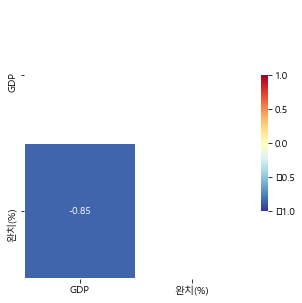

In [22]:
df = gdp_corona_csv.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(5, 5))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

### 결론 > GDP와 완치율이 음의 상관관계에 있다고 볼 수 있기 때문에, 잘사는 나라라고 하여 완치율이 높지는 않다. 